# Homework 4 - Clustering

## Deadline: October 12th, at noon (12:00)

#### General instructions

Please look up the general instructions about homeworks in the first homework.

#### Tracking your time

We will appreciate if you track your time spent on solving the homework and report it in the dedicated cells at the end of the homework. This is not compulsory and does not affect your grade in any way. The collected information will be used to improve future homeworks.

#### About this homework

In this homework, we will get familiar with hierarchical clustering, K-means clustering, and the Principal Components Analysis (PCA). Before solving these tasks please make sure that you have looked through the slides of Lecture 05.

# 1. Hierarchical clustering  (1 point)

Consider the following toy dataset consisting of 9 instances with 2 numeric features x and y. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.DataFrame(
    {'ID':['P1','P2','P3','P4','P5','P6','P7','P8','P9'],
    'x':[0,1,4,2,0,1,3,7,6],
    'y':[1,1,0,3,5,6,6,4,8]})
data

,ID,x,y
0,P1,0,1
1,P2,1,1
2,P3,4,0
3,P4,2,3
4,P5,0,5
5,P6,1,6
6,P7,3,6
7,P8,7,4
8,P9,6,8


**a. First plot the data points and add the IDs of points to the plot using the `plt.annotate` function. You will need this plot later to determine the shortest distances visually, instead of using the computer.**

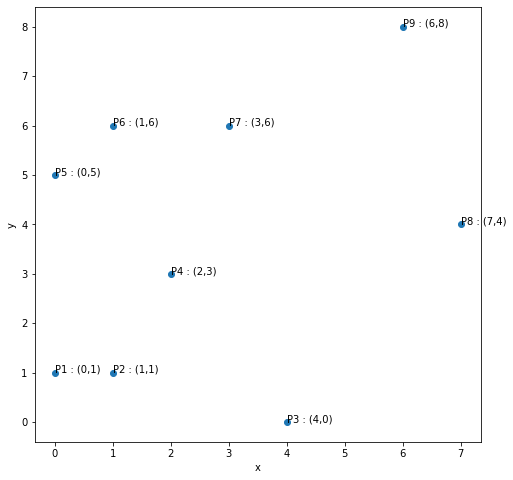

In [3]:
plt.rcParams['figure.figsize'] = [8, 8]
plt.scatter(data['x'], data['y'])
plt.xlabel('x')
plt.ylabel('y')
for i, label in enumerate(data['ID']):
    x = data.iloc[i][1]
    y = data.iloc[i][2] 
    plt.annotate(f'{data.iloc[i][0]} : ({x},{y})', xy=(x, y))

**b. Perform a hierarchical clustering of this toy dataset. Calculate distances between instances using Euclidean distance in the 2-dimensional space determined by features x and y. Note that you will not need to calculate the distances between all points to determine the shortest distance at each step. Instead, you can determine the shortest distance visually by analysing the plot from task (1a). For calculating distances between clusters, use single linkage. Each time when you merge two clusters (even if they consist of only a single instance) please report the following**
* **List of instance IDs in one cluster**
* **List of instance IDs in the other cluster**
* **Distance between these clusters** <br>

**Sometimes there can be alternatives with the same distances, in such case just decide randomly which of the alternatives to choose.** <font color='red'>**However, do not write a program to do all this, but instead do it manually**.</font>

**<font color='red'>Answer:</font>** <br>
$$[P1] + [P2] \ \rightarrow \   d=\sqrt{(0-1)^2+(1-1)^2}=\sqrt{1}=1$$
$$[P5] + [P6] \ \rightarrow \   d=\sqrt{(0-1)^2+(5-6)^2}=\sqrt{2}=1.4$$
$$[P7] + [P5,6]\ \rightarrow \   d=\sqrt{(1-3)^2+(6-6)^2}=2$$
$$[P4] + [P1,2]\ \rightarrow \   d=\sqrt{(1-2)^2+(1-3)^2}=2.2$$
$$[P1,2,4] + [P5,6,7] \ \rightarrow \   d=\sqrt{(0-2)^2+(5-3)^2}=\sqrt{10}=2.8$$
$$[P3] + [P1,2,4,5,6,7] \ \rightarrow \   d=\sqrt{(1-4)^2+(1-0)^2}=\sqrt{10}=3.1$$
$$[P9] + [P1,2,3,4,5,6,7] \ \rightarrow \   d=\sqrt{(3-6)^2+(6-8)^2}=\sqrt{13}=3.6$$
$$[P8] + [P1,2,3,4,5,6,7,9] \ \rightarrow \   d=\sqrt{(6-7)^2+(8-4)^2}=\sqrt{17}=4.1$$

**c. Repeat the same task as in (1b) but now calculate distances between clusters with complete linkage instead of single linkage.**

**<font color='red'>Answer:</font>** <br>
$$[P1] + [P2] \ \rightarrow \   d=\sqrt{(0-1)^2+(1-1)^2}=\sqrt{1}=1$$
$$[P5] + [P6] \ \rightarrow \   d=\sqrt{(0-1)^2+(5-6)^2}=\sqrt{2}=1.4$$
$$[P4] + [P1,2]\ \rightarrow \   d=\sqrt{(0-2)^2+(1-3)^2}=2.8$$
$$[P7] + [P5,6]\ \rightarrow \   d=\sqrt{(0-3)^2+(5-6)^2}=\sqrt{10}=3.1$$
$$[P3] + [P1,2,4] \ \rightarrow \   d=\sqrt{(2-4)^2+(3-0)^2}=\sqrt{13}=3.6$$
$$[P9] + [P8] \ \rightarrow \   d=\sqrt{(6-7)^2+(8-4)^2}=4.1$$
$$[P5,6,7] + [P1,2,3,4] \ \rightarrow \   d=\sqrt{(3-4)^2+(6-0)^2}=6.1$$
$$[P8,9] + [P1,2,3,4,5,6,7] \ \rightarrow \   d=\sqrt{(0-6)^2+(1-8)^2}=9.2$$


**d. Find differences in these two dendrograms (single vs complete):**
<b>

1. Find a subcluster in the single linkage dendrogram such that none of the subclusters in the complete linkage dendrogram consists of exactly the same set of instances. For example, {P1,P2,P4} is a wrong answer because this subcluster exists in both dendrograms.  
2. Find a subcluster in the complete linkage dendrogram such that none of the subclusters in the single linkage dendrogram consists of exactly the same set of instances.
</b>

<i>The code for drawing a dendrogram of the clustering from the subtask 1b and 1c is given below (no need to change anything in this code).</i>

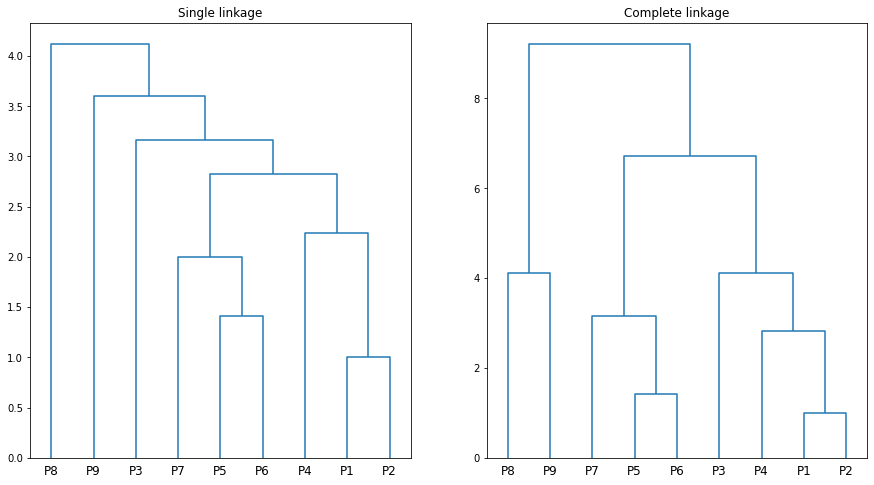

In [4]:
from scipy.cluster import hierarchy
plt.rcParams['figure.figsize'] = [15, 8]

single = hierarchy.linkage(data[['x','y']], 'single')
plt.subplot(1,2,1)
plt.title('Single linkage')
single_dm = hierarchy.dendrogram(single, labels=data.ID.tolist(), color_threshold=0)

complete = hierarchy.linkage(data[['x','y']], 'complete')
plt.subplot(1,2,2)
plt.title('Complete linkage')
complete_dm = hierarchy.dendrogram(complete, labels=data.ID.tolist(), color_threshold=0)

plt.show()

**<font color='red'>Answer:</font>** 
1. The cluster (P1,P2,P4,P5,P6,P7) is existing in the simple linkage dendogram, but it's not is the dendogram dendogram.
2. The cluster (P8,P9) is existing in the complete linkage dendogram, but it's not is the simple dendogram.

# 2. K-means  (1 point)

Explore the visualization of the K-means algorithm at https://www.naftaliharris.com/blog/visualizing-k-means-clustering. Note that you must click on the buttons ‘Update Centroids’ and ‘Reassign Points’ multiple times, until convergence, which means until there are no changes in the contents of clusters. Try running K-means on the Uniform dataset initializing with K=4 randomly chosen cluster centers (no need to report in the homework, this was just for you to get acquainted with this web tool).

**a. Next, try to cluster the Smiley Face dataset on the same website by choosing initial cluster centers manually. Try to use a different number of cluster centers (K=3, K=5, etc). Is it possible to choose the centers so that there would be one cluster which only contains the ‘left eye’ from the perspective of the smiley (the one to the right from your perspective)?**

<font color='red'>Note that you must click on the buttons ‘Update Centroids’ and ‘Reassign Points’ multiple times, until there are no changes in the contents.</font> 

**Make a screenshot image of the final positions of the clusters and include it into your Jupyter notebook file. For this: (1) uncomment the following `Image` command; (2) replace 'screenshot.png' by the correct filename; and (3) run the command. (<font color='red'>NB! After that you only need to submit the .ipynb file as homework, because it contains the screenshot image. Please do not submit the screenshot as an image file.</font>)**

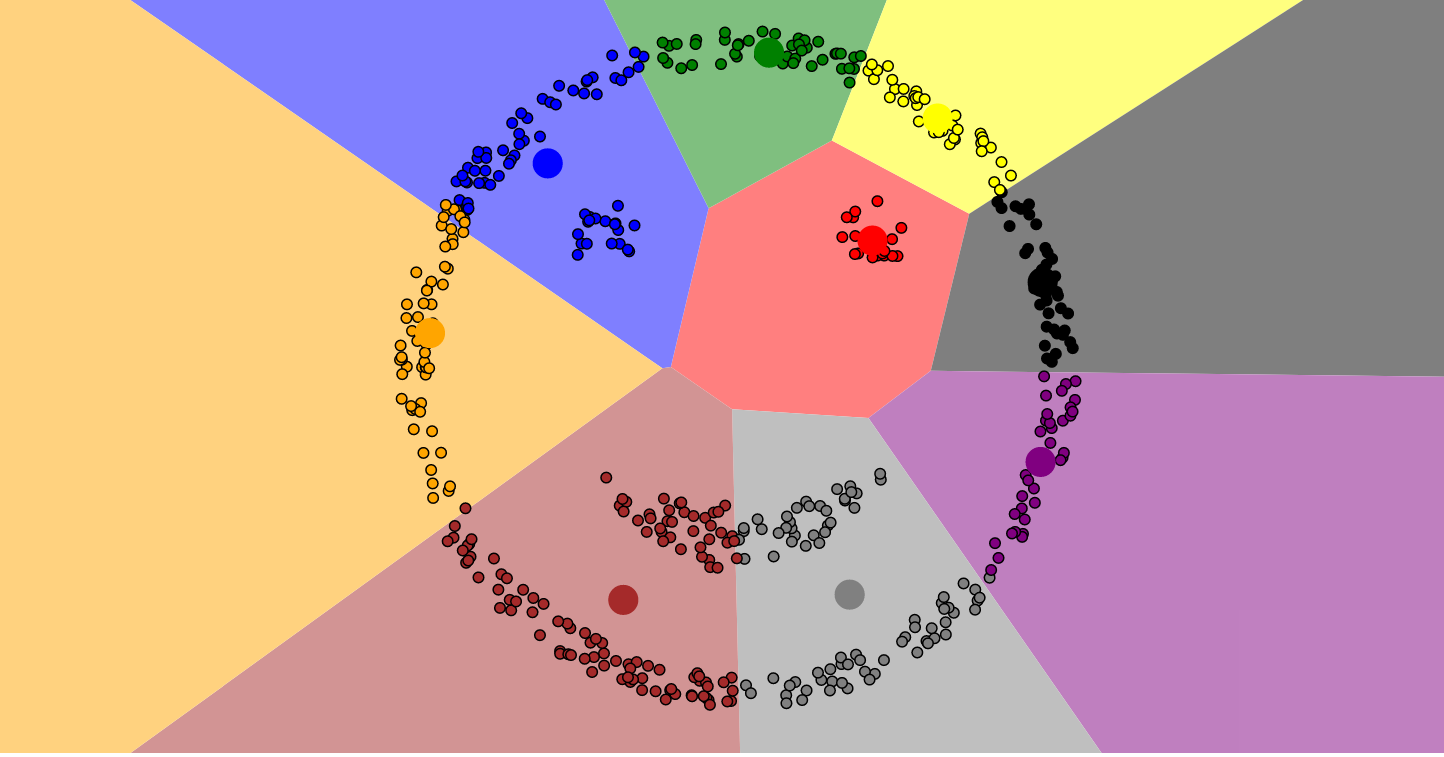

In [5]:
from IPython.display import Image
Image(filename='screenshot.png') # please uncomment this line and replace 'screenshot.png' by the correct filename

**<font color='red'>Answer:</font>** With K = 8, I nailed to separate the left eye from the rest of the face. Maybe it works once with K = 7, but I think i didn't reassign the points enough. With K < 8, it's impossible to separate this eye, because there is too many points around this left eye to isolate him.

**b. Next, perform K-means on the toy data from the previous exercise (Task 1). Do it manually, as you did in Task 1. Use Euclidean distance measure and K=4, initializing the centers at instances with IDs P1, P2, P3 and P4. While following the algorithm the cluster centers can move to points that do not coincide with any of the original data points. Please use letters A, B, C, D as identifiers for these cluster centers, in order to simplify reporting of the results of the algorithm. After each step of calculating a new center please report for each cluster:**
* The ID of the cluster center and the coordinates
* The list of instance IDs that have been assigned to this cluster <br>

Text(2.5, 6.25, 'D')

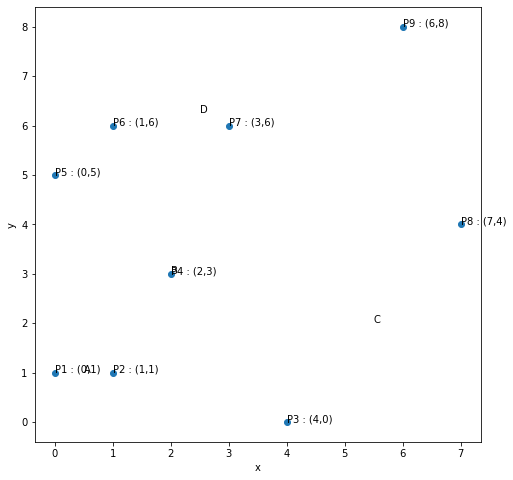

In [6]:
plt.rcParams['figure.figsize'] = [8, 8]
plt.scatter(data['x'], data['y'])
plt.xlabel('x')
plt.ylabel('y')
for i, label in enumerate(data['ID']):
    x = data.iloc[i][1]
    y = data.iloc[i][2] 
    plt.annotate(f'{data.iloc[i][0]} : ({x},{y})', xy=(x, y))
plt.annotate(f'A', xy=(0.5, 1))
plt.annotate(f'B', xy=(2, 3))
plt.annotate(f'C', xy=(5.5, 2))
plt.annotate(f'D', xy=(2.5, 6.25))

**<font color='red'>Answer:</font>** <br>
Assigning points to the closest centers:
$$A\ (0,1) \ \leftarrow \   [P1] $$
$$B\ (1,1) \ \leftarrow \   [P2] $$
$$C\ (4,0) \ \leftarrow \   [P3, P8] $$
$$D\ (2,3) \ \leftarrow \   [P4, P5, P6, P7, P9] $$
Recalculating centers:
$$A\ (0,1) \ \leftarrow \   [P1] $$
$$B\ (1,1) \ \leftarrow \   [P2] $$
$$C\ (5.5,2) \ \leftarrow \   [P3, P8] $$
$$D\ (2.4,5.6) \ \leftarrow \   [P4, P5, P6, P7, P9]$$

Assigning points to the closest centers:
$$A\ (0,1) \ \leftarrow \   [P1] $$
$$B\ (1,1) \ \leftarrow \   [P2,P4] $$
$$C\ (5.5,2) \ \leftarrow \   [P3, P8] $$
$$D\ (2.4,5.6) \ \leftarrow \   [P5, P6, P7, P9]$$
Recalculating centers:
$$A\ (0,1) \ \leftarrow \   [P1] $$
$$B\ (1.5,2) \ \leftarrow \   [P2,P4] $$
$$C\ (5.5,2) \ \leftarrow \   [P3, P8] $$
$$D\ (2.5,6.25) \ \leftarrow \   [P5, P6, P7, P9]$$

Assigning points to the closest centers:
$$A\ (0,1) \ \leftarrow \   [P1] $$
$$B\ (1,1) \ \leftarrow \   [P2,P4] $$
$$C\ (5.5,2) \ \leftarrow \   [P3, P8] $$
$$D\ (2.4,5.6) \ \leftarrow \   [P5, P6, P7, P9]$$
Recalculating centers:
$$A\ (0,1) \ \leftarrow \   [P1,P2] $$
$$B\ (1.5,2) \ \leftarrow \   [P4] $$
$$C\ (5.5,2) \ \leftarrow \   [P3, P8] $$
$$D\ (2.5,6.25) \ \leftarrow \   [P5, P6, P7, P9]$$

Assigning points to the closest centers:
$$A\ (0.5,1) \ \leftarrow \   [P1,P2] $$
$$B\ (2,3) \ \leftarrow \   [P4] $$
$$C\ (5.5,2) \ \leftarrow \   [P3, P8] $$
$$D\ (2.5,6.25) \ \leftarrow \   [P5, P6, P7, P9]$$
Recalculating centers:
$$A\ (0.5,1) \ \leftarrow \   [P1,P2] $$
$$B\ (2,3) \ \leftarrow \   [P4] $$
$$C\ (5.5,2) \ \leftarrow \   [P3, P8] $$
$$D\ (2.5,6.25) \ \leftarrow \   [P5, P6, P7, P9]$$

$$And\ then, it's\ converging$$

<font color='red'>Continue writing out the results of steps until convergence.</font>

# 3. Handwritten digits dataset  (2 point)

In this task you have to deal with digits dataset provided by sklearn datasets. There is total of 1797 8x8 grayscale images. If you do not have the `sklearn` package, then please install it using `conda install scikit-learn` or `pip install -U scikit-learn`.

<Figure size 576x576 with 0 Axes>

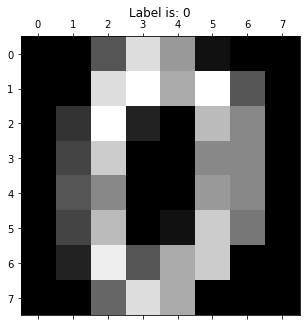

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits # More info at http://scikit-learn.org/stable/datasets/index.html

digits = load_digits(as_frame=True)
labels = digits.target
pixels_data = digits.data # pixels in the range 0..16
n_digits = len(np.unique(digits.target))


# Display first digit
plt.gray()
plt.rcParams['figure.figsize'] = [5 ,5]
plt.matshow(digits.images[0]) 
plt.grid(False)
plt.title('Label is: ' + str(digits.target[0]))
plt.show()

digits.data.describe()

**a. Use KMeans from sklearn.cluster package to run k-means with k=10 on this dataset and find cluster assignments. Also, use <code>random_state=1</code> to get the same results on each run. Which clusters do the first 3 images in the dataset belong to? What are the actual labels of these 3 images?** <br>
Hint 1. Look at the lecture slides

In [8]:
# TODO
from sklearn.cluster import KMeans
cluster_assignments = KMeans(n_clusters=10,random_state=1).fit_predict(digits.data)
print(cluster_assignments[0:10])
print(digits.target[0:10])

[6 3 3 4 8 9 1 2 9 9]
0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
Name: target, dtype: int32


**<font color='red'>Answer to question 1: The first 3 images belong to clusters:</font>** 6,3,3

**<font color='red'>Answer to question 2: The actual labels of these 3 images are:</font>** 0,1,2

**b. Look at the images in the 0th cluster. What can you see? Is it a good cluster?** A sample code is given what can be used to visualize all the numbers from the cluster 0 (no need to change anything in this code).

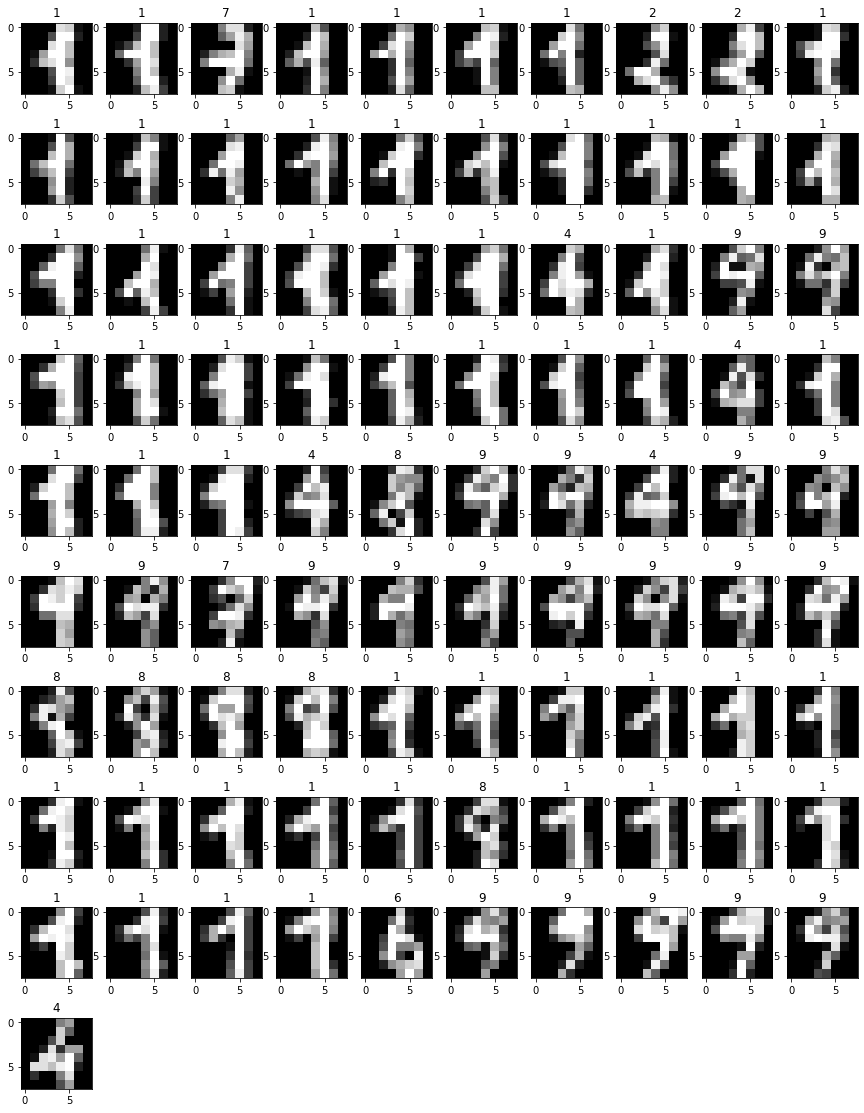

In [9]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 15, 20
plt.gray()

subplot_index = 1
for  idx, cluster in enumerate(cluster_assignments):
    if (cluster == 0):
        plt.subplot(10, 10, subplot_index)
        plt.grid(False) # Remove grid
        plt.title(digits.target[idx]) # target label; real label
        plt.imshow(digits.images[idx])
        subplot_index +=1
plt.show()

**<font color='red'>Answer:</font>** On the 91 images printed, there is 55 images who is labelled as a one. So, we can say that the 0th cluster is a pretty good cluster, because there is a lot of images with the same label, but we must remind us that there is like 50% of 1 and 50% of other labels.

**c. For each cluster, find the most frequent label within that cluster. For this, write a piece of code that finds the labels of all images within a cluster, counts the frequencies of these labels, and finds out which label is the most frequent one.** <br>
Hint 1. You can use a crosstab and create a heatmap. Look at the lecture slides.<br>
Hint 2. Cluster 1 does not mean that it includes images of ones.

In [10]:
# TODO
from collections import Counter
liste_labels = []
number = 0

Counter(liste_labels).most_common(1)

for i in range(0,10):
    liste_labels.append([])


for  idx, cluster in enumerate(cluster_assignments):
    #liste_labels.insert(cluster,digits.target[idx])
    liste_labels[cluster].append(digits.target[idx])
    #print(liste_labels)

for i in range(0,10):
    print("For the cluster n°",i,"the most common label is label n°:",Counter(liste_labels[i]).most_common(1)[0][0],
          "with",Counter(liste_labels[i]).most_common(1)[0][1],"on a total of",len(liste_labels[i]),"elements",
         "("+str(round((Counter(liste_labels[i]).most_common(1)[0][1]/len(liste_labels[i])*100),2))+"%)")
#print(liste_labels)


For the cluster n° 0 the most common label is label n°: 1 with 55 on a total of 91 elements (60.44%)
For the cluster n° 1 the most common label is label n°: 6 with 177 on a total of 182 elements (97.25%)
For the cluster n° 2 the most common label is label n°: 7 with 175 on a total of 206 elements (84.95%)
For the cluster n° 3 the most common label is label n°: 8 with 100 on a total of 223 elements (44.84%)
For the cluster n° 4 the most common label is label n°: 3 with 155 on a total of 179 elements (86.59%)
For the cluster n° 5 the most common label is label n°: 2 with 148 on a total of 175 elements (84.57%)
For the cluster n° 6 the most common label is label n°: 0 with 177 on a total of 179 elements (98.88%)
For the cluster n° 7 the most common label is label n°: 5 with 136 on a total of 149 elements (91.28%)
For the cluster n° 8 the most common label is label n°: 4 with 164 on a total of 167 elements (98.2%)
For the cluster n° 9 the most common label is label n°: 9 with 139 on a tota

**<font color='red'>Cluster 0 most frequent label :</font>** 1

**<font color='red'>Cluster 1 most frequent label :</font>** 6

**<font color='red'>Cluster 2 most frequent label :</font>** 7

**<font color='red'>Cluster 3 most frequent label :</font>** 8

**<font color='red'>Cluster 4 most frequent label :</font>** 3

**<font color='red'>Cluster 5 most frequent label :</font>** 2

**<font color='red'>Cluster 6 most frequent label :</font>** 0

**<font color='red'>Cluster 7 most frequent label :</font>** 5

**<font color='red'>Cluster 8 most frequent label :</font>** 4

**<font color='red'>Cluster 9 most frequent label :</font>** 9

**d. Find the percentage of the most frequent label in cluster 3 with respect to the size of this cluster. Do the same with cluster 5.** <br>

In [11]:
# TODO
#Already done with all cluster above

**<font color='red'>The percentage of the most frequent label in cluster 3:</font>** For the cluster n° 3 the most common label is label n°: 8 with 100 on a total of 223 elements (44.84%)

**<font color='red'>The percentage of the most frequent label in cluster 5:</font>** For the cluster n° 5 the most common label is label n°: 2 with 148 on a total of 175 elements (84.57%)

**e. Now perform the PCA on this data (compress data into 3 components) and store it in the variable `reduced_data` as a Pandas DataFrame with 3 columns corresponding to PC1, PC2 and PC3. For doing this, use `PCA` from the package `sklearn.decomposition`. Report the PC1-, PC2- and PC3-coordinate for each of the first 3 images in the dataset.** <br>
Hint 1. Look at the lecture slides.

In [12]:
# TODO
from sklearn.decomposition import PCA

reduced_data  = pd.DataFrame(PCA(n_components=3).fit_transform(digits.data))
reduced_data.columns = ['PC'+str(i+1) for i in range(3)]
reduced_data.head()

,PC1,PC2,PC3
0,-1.259465,21.274881,-9.463053
1,7.957614,-20.768701,4.439509
2,6.991921,-9.955985,2.958558
3,-15.906104,3.332464,9.824371
4,23.306866,4.269060,-5.675128


**<font color='red'>PC-coordinates of instance 1:</font>** For the first image :
- PC1 : -1.3
- PC2 : 21.3
- PC3 : -9.5

**<font color='red'>PC-coordinates of instance 2:</font>** For the second image :
- PC1 : 7.9
- PC2 : -20.8
- PC3 : 4.4

**<font color='red'>PC-coordinates of instance 3:</font>** For the third image :
- PC1 : 7.0
- PC2 : -10.0
- PC3 : 3.0

**f. Compare the following scatter plots: PC1 vs PC2 and PC1 vs PC3. Which clusters are well-separated and which are not in each plot? Is this an expected result? The code for this has been given below. There's no need to change anything, unless you prefer a color blind friendly palette for the plot, in which case you should uncomment line 5.** 

In [13]:
def plotPCA(X, Y, xlabel, ylabel):
    rcParams['figure.figsize'] = 15, 10

    colors = {0:'black',1:'red',2:'darkgreen',3:'deeppink',4:'purple',5:'yellow',6:'gold',7:'blue',8:'brown',9:'lime'}
    #colors = {0:'black',1:'#ff7f00',2:'#4daf4a',3:'#f781bf',4:'#a65628',5:'#984ea3',6:'#999999',7:'#e41a1c',8:'#dede00',9:'#377eb8'}
    
    plt.scatter(X, Y, c=np.array([colors[label] for label in labels]))

    plt.title(xlabel + ' vs ' + ylabel)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='',markersize='12') for color in colors.values()]
    plt.legend(markers, colors.keys(), numpoints=1)

    
    plt.xticks(())
    plt.yticks(())
    plt.show()

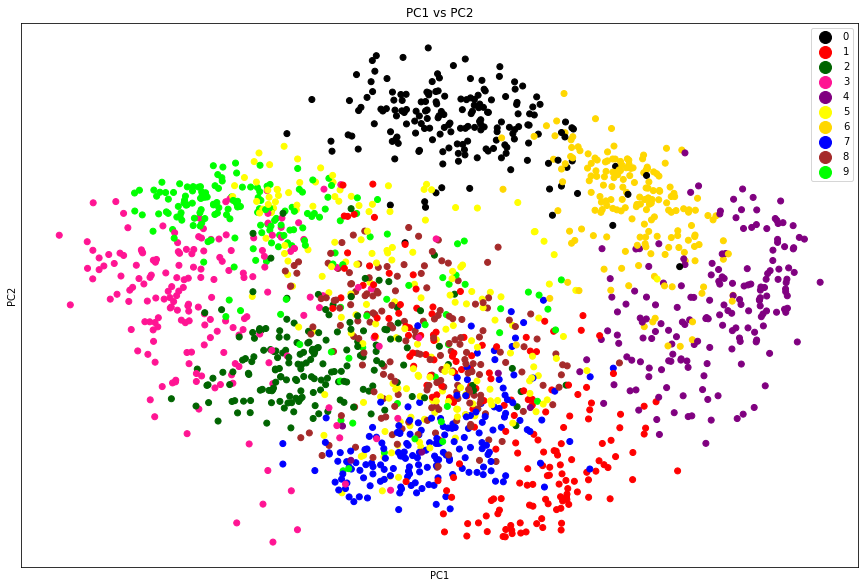

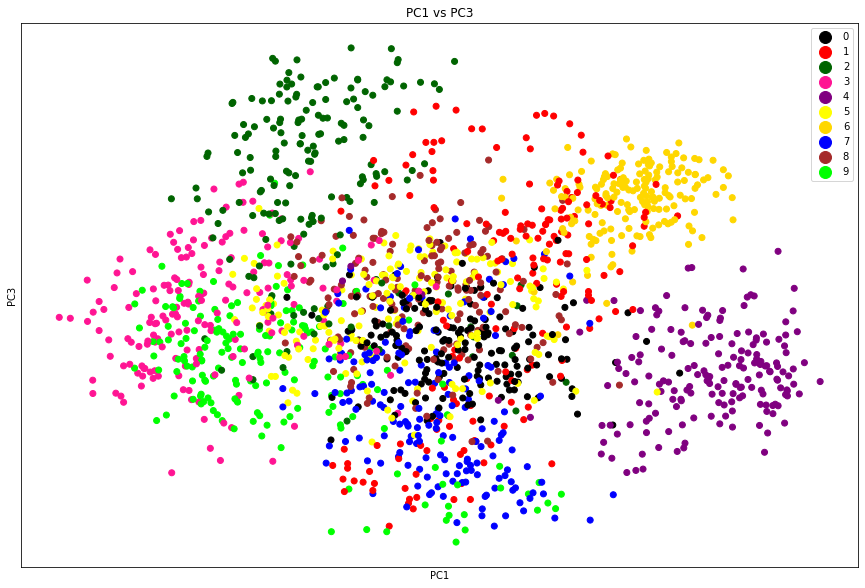

In [14]:
plotPCA(reduced_data.iloc[:, 0], reduced_data.iloc[:, 1], 'PC1', 'PC2')
plotPCA(reduced_data.iloc[:, 0], reduced_data.iloc[:, 2], 'PC1', 'PC3')

**<font color='red'>Answer 1 (Which clusters are well-separated and which are not in each plot?):</font>** For the first plot (PC1 vs PC2), we can say that the clusters 0,4,6 are well separated, and the clusters 1,8,9 are really not separated. For the second plot (PC2 vs PC3), we can say that the clusters 0,4,6 are well separated, and the clusters 1,8,9 are really not separated.

**<font color='red'>Answer 2 (Is this an expected result?):</font>** This is why we were expecting because if we compare to the percentage above, done with the Kmeans methods, we have approximatively the same results. So we can say it's easier to recognize a 0,2,4 or 6 but it's harder to recognize a 1,8 or 9.

## <font color='red'>This was the last task! Please restart the kernel and run all before submission! (`Kernel -> Restart and Run All`)</font>

## How long did it take you to solve the homework?

Please answer as precisely as you can. It does not affect your points or grade in any way. It is okey, if it took 0.5 hours or 24 hours. Please count in astronomical hours (1 hour = 60 minutes) and not academic hours (1 hour = 45 minutes). The collected information will be used to improve future homeworks.

**<font color='red'>Task 1 (please change X in the next cell into your estimate)</font>**

1 hour

**<font color='red'>Task 2 (please change X in the next cell into your estimate)</font>**

1.5 hour

**<font color='red'>Task 3 (please change X in the next cell into your estimate)</font>**

1.5 hours

**<font color='red'>TOTAL (please change X in the next cell into your estimate)</font>**

4 hours

**<font color='red'>THANK YOU FOR YOUR EFFORT!</font>**